# Insurance Premium Prediction using Regression Algorithms

# Problem Statement


The leading Insurance company offers affordable health insurance to thousands of customers. We're tasked with creating an automated system to estimate the annual medical insurance expenditure for new customer, using information such as their age, sex, BMI, children, smoking habits etc.

Estimates from our system will be used to determine the annual insurance premium charges (amount paid every month) offered to the customer.

Data set From Kaggle https://www.kaggle.com/noordeen/insurance-premium-prediction

# AIM & OBJECTIVES

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. We can do it using the historical data, then we will estimate charges for new customers, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

# LOADING PACKAGES

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import math
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *


#DATA LOADING

HERE WE PROCEED TO LOAD DATA FROM LOCAL DEVICE. 
BELOW ARE DATA INFORMATION 

In [100]:
premium_insure=pd.read_csv("C:\\Users\\bidault\\Downloads\\new_insurance_dataset.csv")

# DATA PREPROCESSING

In [101]:
premium_insure

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [102]:
premium_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [103]:
premium_insure.head(5)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [104]:
premium_insure.shape

(1338, 13)

In [105]:
premium_insure.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [106]:
cols=premium_insure.columns

In [107]:
premium_insure.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [108]:
premium_insure.isnull().sum() /100

age                                0.09
sex                                0.00
bmi                                0.03
children                           0.05
smoker                             0.00
Claim_Amount                       0.14
past_consultations                 0.06
num_of_steps                       0.03
Hospital_expenditure               0.04
NUmber_of_past_hospitalizations    0.02
Anual_Salary                       0.06
region                             0.00
charges                            0.00
dtype: float64

In [109]:
missing = (premium_insure.isnull().sum()).astype(str) + '%'
print(missing)


age                                 9%
sex                                 0%
bmi                                 3%
children                            5%
smoker                              0%
Claim_Amount                       14%
past_consultations                  6%
num_of_steps                        3%
Hospital_expenditure                4%
NUmber_of_past_hospitalizations     2%
Anual_Salary                        6%
region                              0%
charges                             0%
dtype: object


In [110]:
premium_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

# Visualization of missing value report 

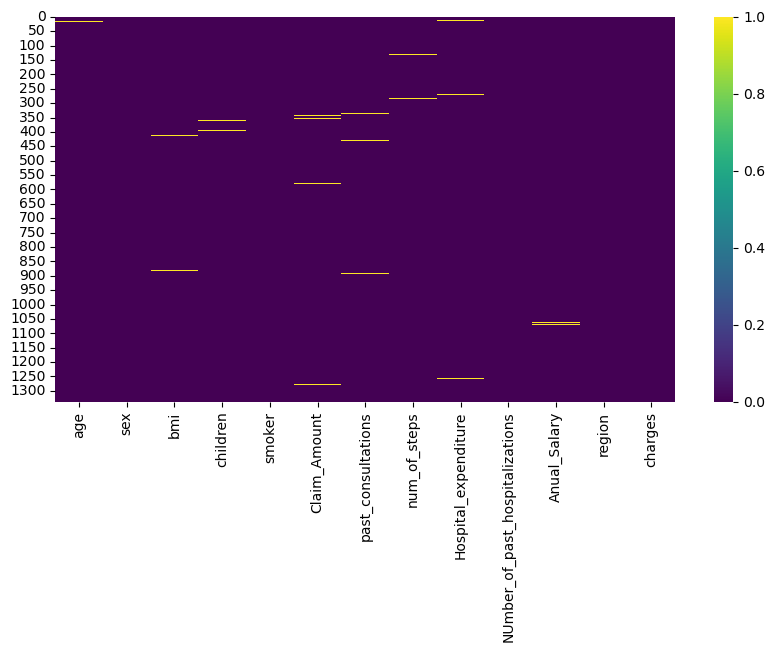

In [111]:
#visualizing null values
plt.figure(figsize = (10,5))
sns.heatmap(premium_insure.isnull(), cmap= 'viridis');

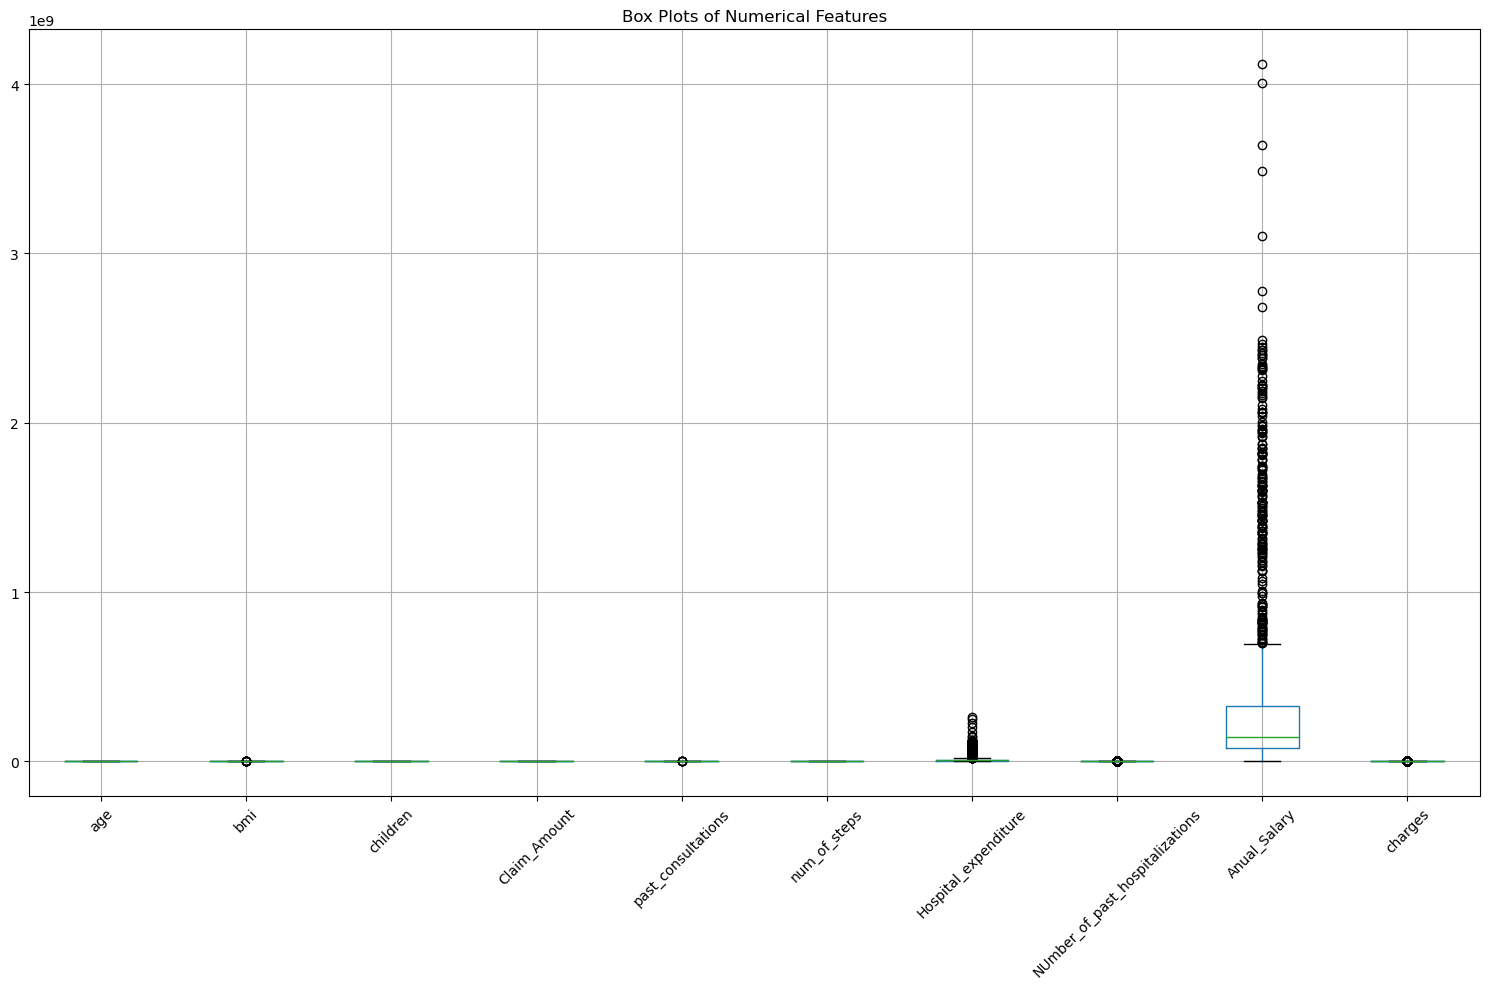

In [112]:
numerical_features = premium_insure.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
premium_insure[numerical_features].boxplot()
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

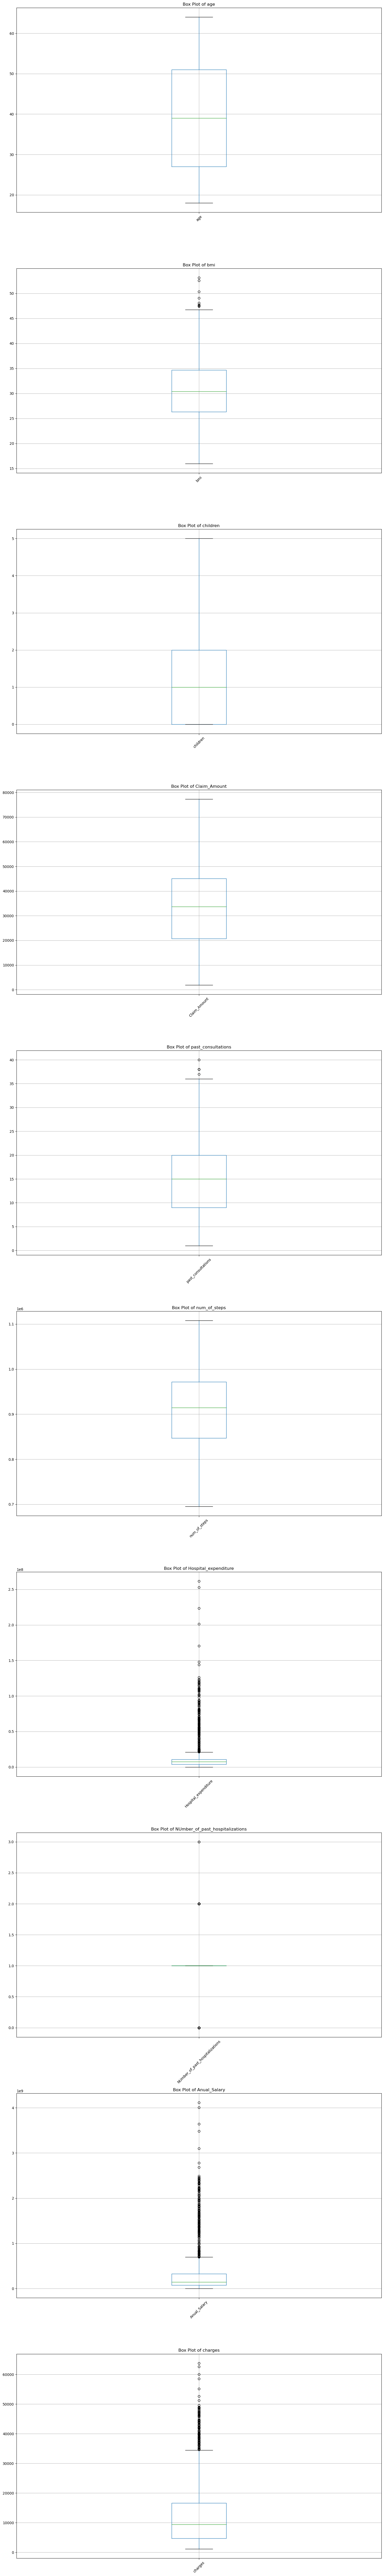

In [113]:
# Select numerical features
numerical_features = premium_insure.select_dtypes(include=['float64', 'int64']).columns

# Set the size of the entire figure
plt.figure(figsize=(15, len(numerical_features) * 10)) 

# Loop through each numerical feature and plot it
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)  # Create subplots for each feature
    premium_insure.boxplot(column=feature)
    plt.title(f'Box Plot of {feature}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()

In [114]:
premium_insure.duplicated().sum()

0

# Filling missing data with mean

Mean for normally distributed numerical data.

Median for skewed numerical data or when there are outliers.

Mode for categorical or discrete data.

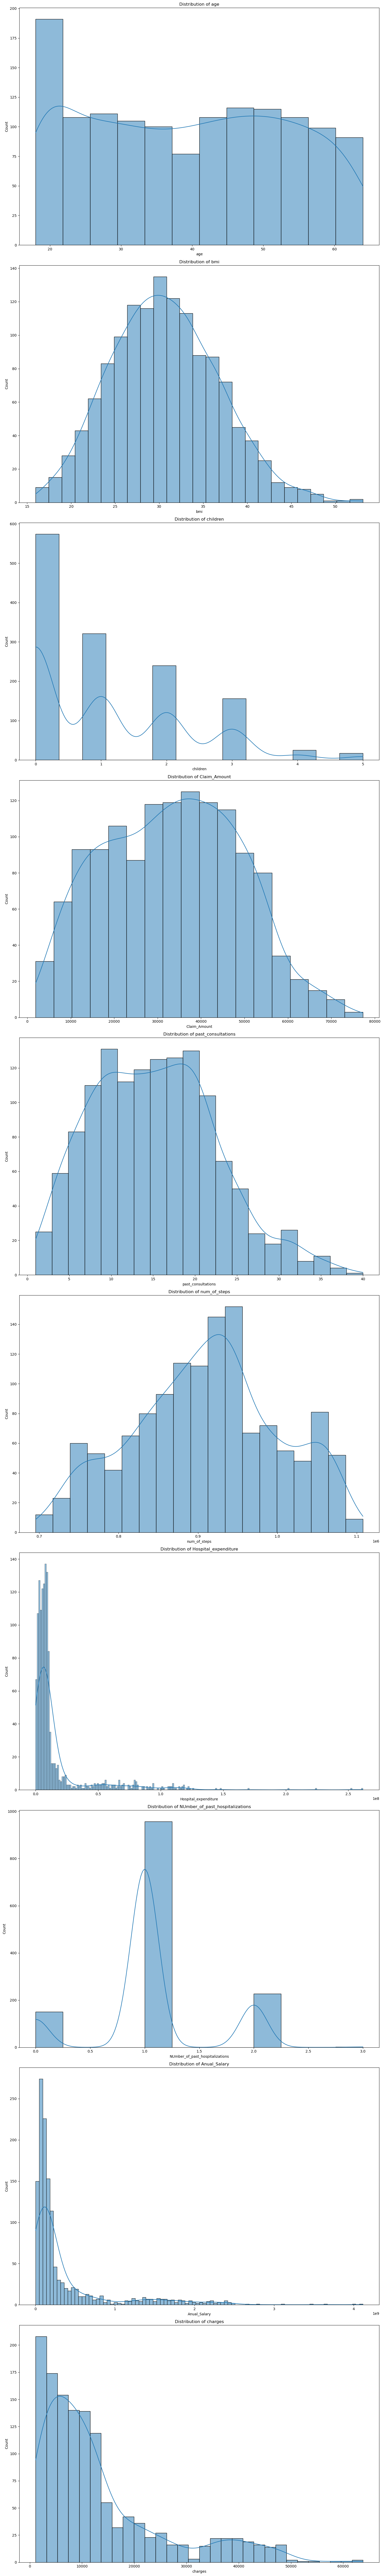

In [115]:
# Set the size of the figure
plt.figure(figsize=(15, len(numerical_features) * 10))

# Loop through each numerical feature and plot its distribution
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)  # Create subplots for each feature
    sns.histplot(premium_insure[feature], kde=True)  # Use histplot with KDE (Kernel Density Estimation)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

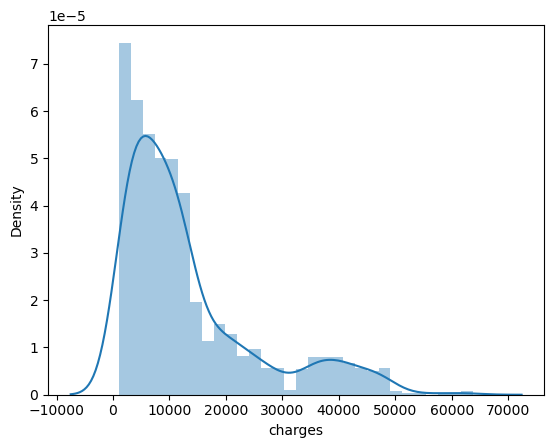

In [116]:
#distribution plot of target variable
sns.distplot(premium_insure.charges);

For this Analysis we will make use of median since we have much outliers and also distribution is skewed

In [117]:

#for object type values we prefer using modefor col_name in col:

cols = premium_insure.columns

for i in cols:    #Using for loop
    if premium_insure[i].dtypes == object:
        premium_insure[i] = premium_insure[i].fillna(premium_insure[i].mode()[0])
    else:
        premium_insure[i] = premium_insure[i].fillna(premium_insure[i].mean())

In [118]:
premium_insure.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

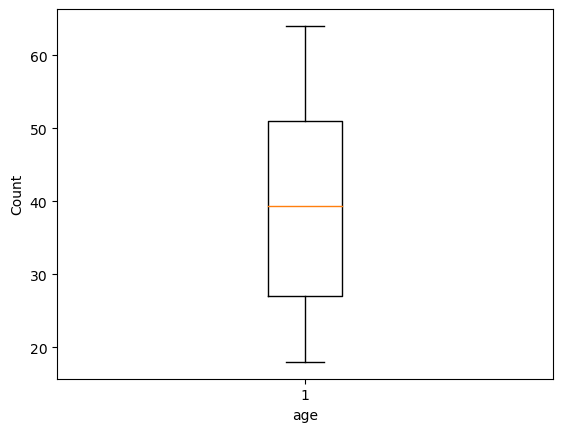

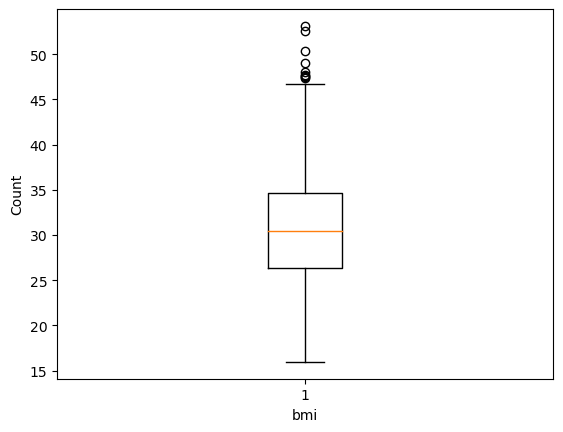

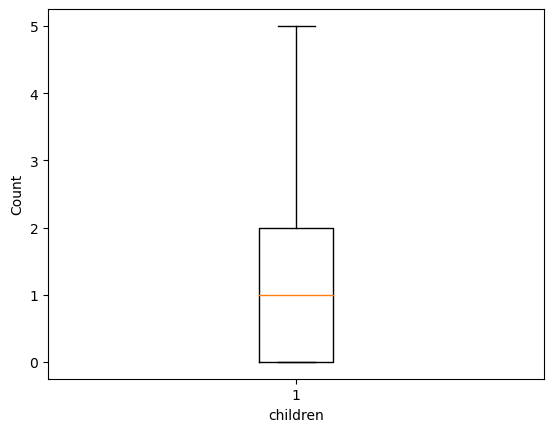

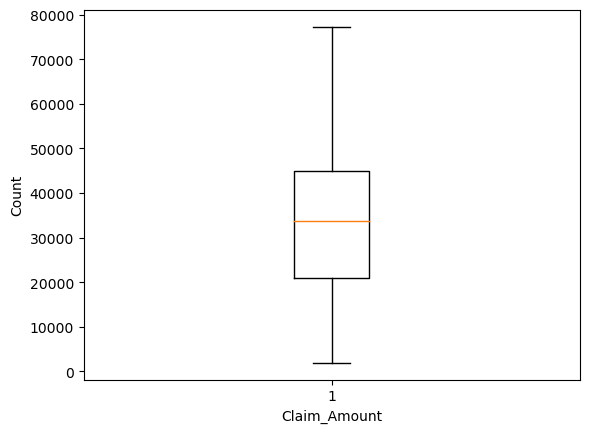

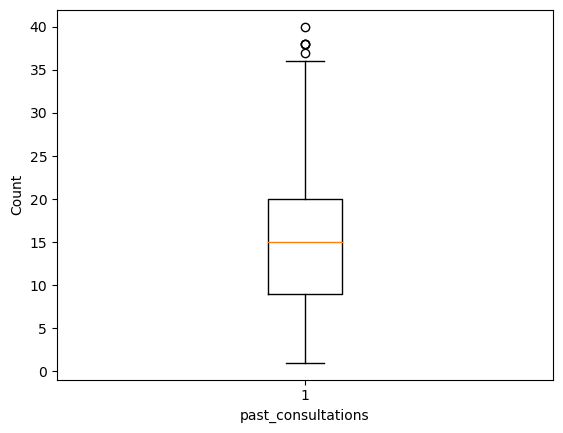

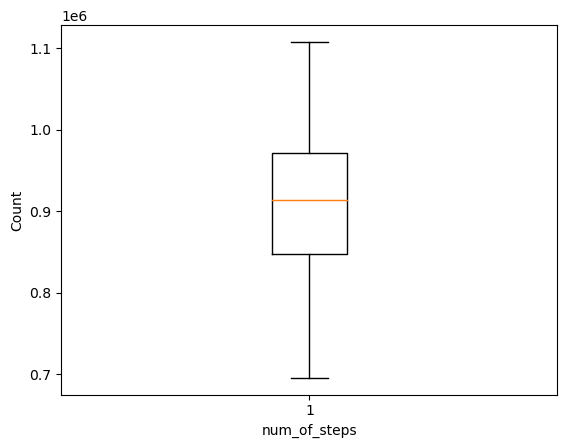

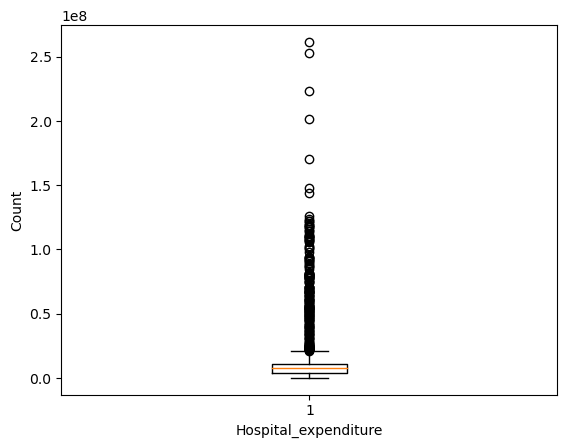

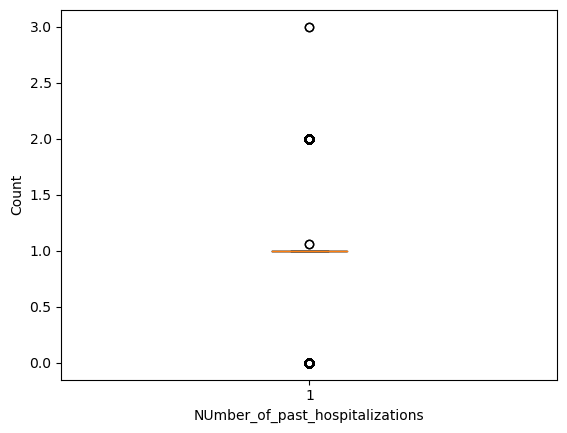

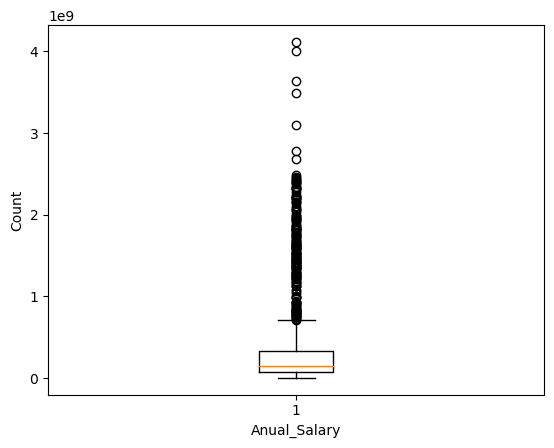

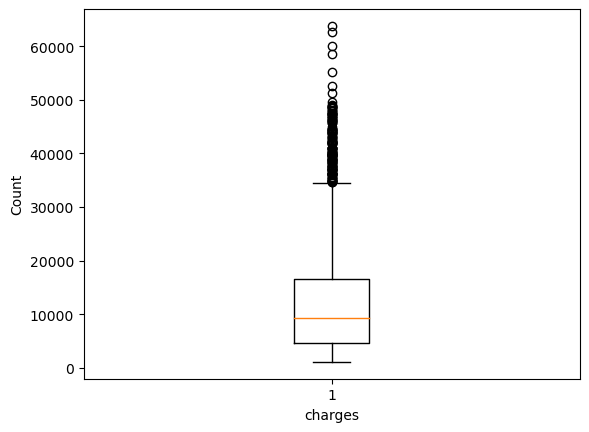

In [119]:
for i in cols:
    if premium_insure[i].dtypes == object:
      pass
    else:
      plt.boxplot(premium_insure[i])
      plt.xlabel(i)
      plt.ylabel('Count')
      plt.show()

# Treating Outlier (variables with outliers)

In [120]:
#BMI
Q1= premium_insure.bmi.quantile(0.25)
Q3= premium_insure.bmi.quantile(0.75)
IQR=Q3-Q1
premium_insure=premium_insure[(premium_insure.bmi >=Q1-1.5*IQR) & (premium_insure.bmi <=Q3+1.5*IQR)]

#past_consultations

Q1= premium_insure.past_consultations.quantile(0.25)
Q3= premium_insure.past_consultations.quantile(0.75)
IQR=Q3-Q1
premium_insure=premium_insure[(premium_insure.past_consultations >=Q1-1.5*IQR) & (premium_insure.past_consultations <=Q3+1.5*IQR)]

#Hospital_expenditure

Q1= premium_insure.Hospital_expenditure.quantile(0.25)
Q3= premium_insure.Hospital_expenditure.quantile(0.75)
IQR=Q3-Q1
premium_insure=premium_insure[(premium_insure.Hospital_expenditure >=Q1-1.5*IQR) & (premium_insure.Hospital_expenditure <=Q3+1.5*IQR)]

#Annual Salary
Q1= premium_insure.Anual_Salary.quantile(0.25)
Q3= premium_insure.Anual_Salary.quantile(0.75)
IQR=Q3-Q1
premium_insure=premium_insure[(premium_insure.Anual_Salary >=Q1-1.5*IQR) & (premium_insure.Anual_Salary <=Q3+1.5*IQR)]

#Charges
Q1= premium_insure.charges.quantile(0.25)
Q3= premium_insure.charges.quantile(0.75)
IQR=Q3-Q1
premium_insure=premium_insure[(premium_insure.charges >=Q1-1.5*IQR) & (premium_insure.charges <=Q3+1.5*IQR)]

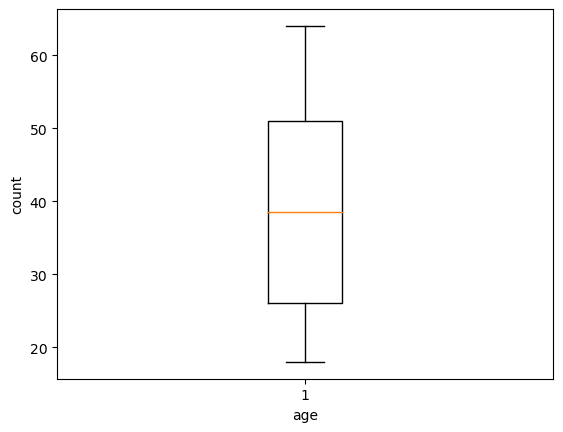

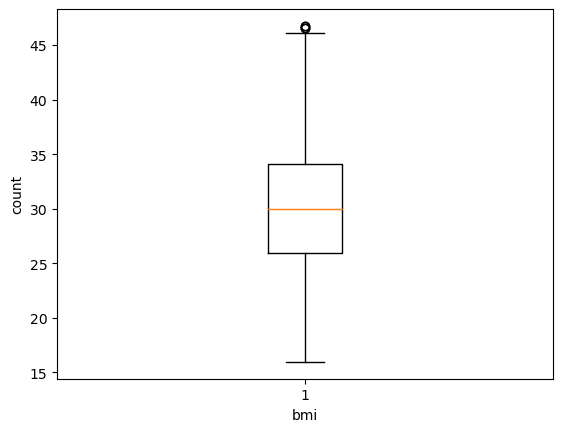

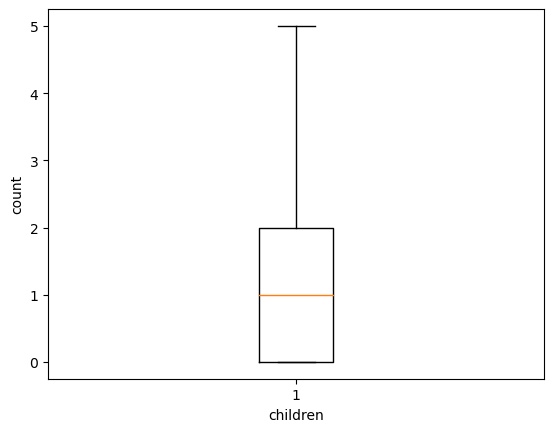

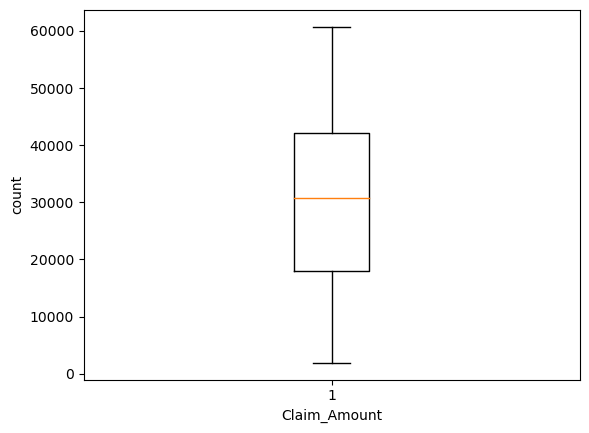

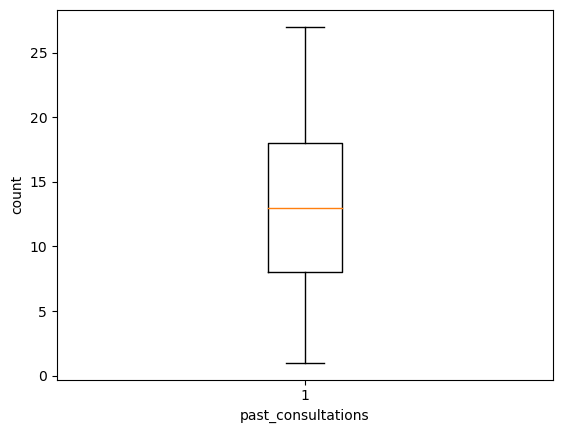

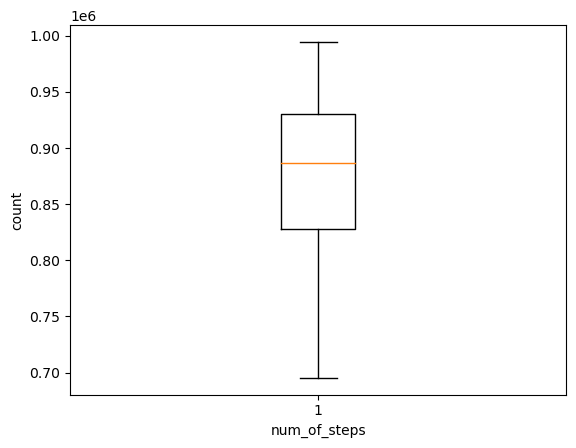

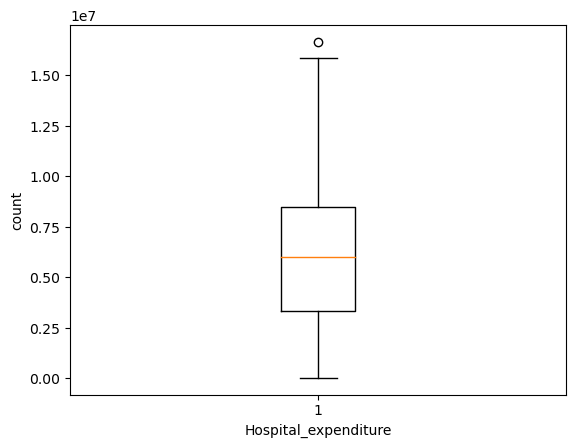

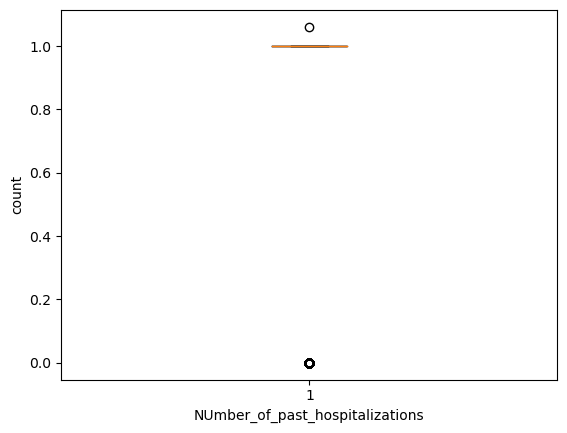

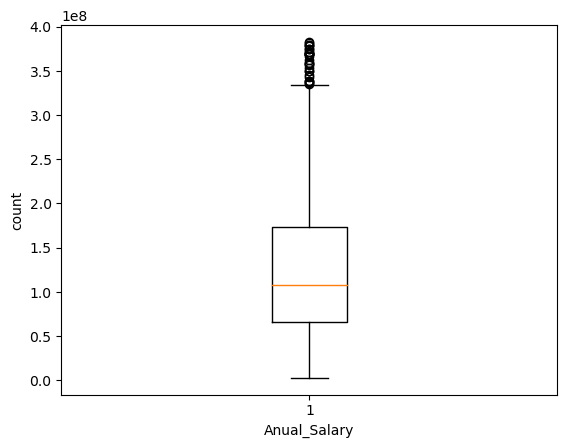

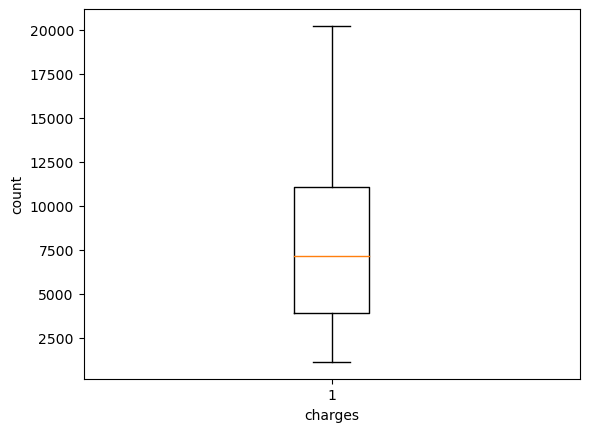

In [121]:
#Boxplot of treated outliers

for i in cols:
    if premium_insure[i].dtypes==object:
        pass
    else:
        plt.boxplot(premium_insure[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

# Multi Colinearity


one feature is affecting more than one other feature - multicollinearity

we dont want multicollinearity in our dataset

VIF s|hould be less than 6, if more we drop columns

In [125]:
premium_insure

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


# Using one hot encoding to decode categorical variables like Age, location


In [126]:
from sklearn.preprocessing import OneHotEncoder

# Step 1: Identify categorical features
categorical_features = premium_insure.select_dtypes(include=['object']).columns

# Step 2: Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' avoids multicollinearity by dropping one category

# Step 3: Apply the encoder on the categorical columns
encoded_columns = pd.DataFrame(encoder.fit_transform(premium_insure[categorical_features]), 
                               columns=encoder.get_feature_names_out(categorical_features))

# Step 4: Concatenate encoded columns with the original dataframe (after dropping the original categorical columns)
premium_insure_encoded = pd.concat([premium_insure.drop(categorical_features, axis=1), encoded_columns], axis=1)

# Display the first few rows of the encoded dataframe
print(premium_insure_encoded.head())


    age    bmi  children  Claim_Amount  past_consultations  num_of_steps  \
0  18.0  23.21       0.0   29087.54313                17.0      715428.0   
1  18.0  30.14       0.0   39053.67437                 7.0      699157.0   
2  18.0  33.33       0.0   39023.62759                19.0      702341.0   
3  18.0  33.66       0.0   28185.39332                11.0      700250.0   
4  18.0  34.10       0.0   14697.85941                16.0      711584.0   

   Hospital_expenditure  NUmber_of_past_hospitalizations  Anual_Salary  \
0           4720920.992                              0.0   55784970.05   
1           4329831.676                              0.0   13700885.19   
2           6884860.774                              0.0   73523107.27   
3           4274773.550                              0.0   75819679.60   
4           3787293.921                              0.0   23012320.01   

     charges  sex_male  smoker_yes  region_northwest  region_southeast  \
0  1121.8739       1.0  

After Using One hot encoding; There are null values generated.
So below is the steps used in removing 
1. coerce all non numeric to numeric 
2. Drop all NAn with Dropna()

In [129]:
premium_insure_encoded= premium_insure_encoded.apply(pd.to_numeric, errors='coerce')

In [130]:
premium_insure_encoded = premium_insure_encoded.dropna()

In [133]:
prem_data=premium_insure_encoded
prem_data.isnull().sum()

age                                0
bmi                                0
children                           0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
charges                            0
sex_male                           0
smoker_yes                         0
region_northwest                   0
region_southeast                   0
region_southwest                   0
dtype: int64

# V IF checking using coreelation and heatmap first

In [142]:
Multi_C=prem_data.corr()
Multi_C

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.155748,0.044456,0.118455,0.179571,0.769236,0.177452,0.523388,0.530979,0.714898,-0.059987,-0.027140,-0.002454,-0.071095,0.017315
bmi,0.155748,1.000000,0.010893,0.009245,0.028603,0.051985,0.030134,0.018899,0.024966,0.028419,0.038674,-0.058093,0.034178,-0.002918,-0.044069
children,0.044456,0.010893,1.000000,0.039751,0.041768,0.230839,-0.012773,0.317888,0.064459,0.141385,0.034202,0.034262,0.069677,-0.098006,-0.003711
Claim_Amount,0.118455,0.009245,0.039751,1.000000,0.068403,0.187441,0.051778,0.109996,0.163946,0.198825,0.019989,0.125136,-0.039243,0.003974,-0.001293
past_consultations,0.179571,0.028603,0.041768,0.068403,1.000000,0.250404,0.068639,0.133045,0.252338,0.266503,0.020405,0.119974,0.014393,0.013319,-0.027901
num_of_steps,0.769236,0.051985,0.230839,0.187441,0.250404,1.000000,0.274832,0.718312,0.763634,0.939194,-0.084649,0.288636,0.007060,-0.079098,-0.005311
Hospital_expenditure,0.177452,0.030134,-0.012773,0.051778,0.068639,0.274832,1.000000,0.123737,0.323931,0.320756,-0.038303,0.202267,0.022540,-0.014042,-0.028981
NUmber_of_past_hospitalizations,0.523388,0.018899,0.317888,0.109996,0.133045,0.718312,0.123737,1.000000,0.363965,0.546533,-0.097113,0.084267,0.046642,-0.096517,-0.000538
Anual_Salary,0.530979,0.024966,0.064459,0.163946,0.252338,0.763634,0.323931,0.363965,1.000000,0.884323,-0.055946,0.476226,-0.011782,-0.018342,-0.018787
charges,0.714898,0.028419,0.141385,0.198825,0.266503,0.939194,0.320756,0.546533,0.884323,1.000000,-0.071538,0.412683,-0.000482,-0.064282,-0.007302


<Axes: >

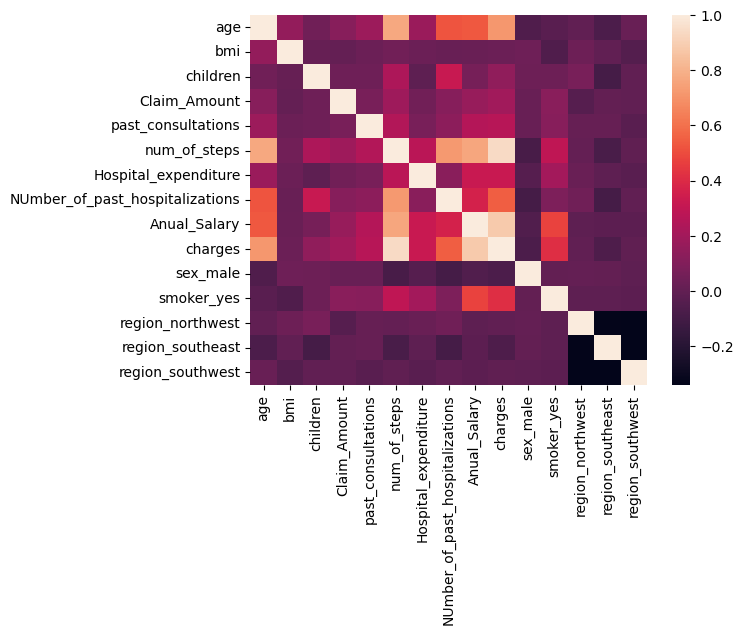

In [143]:
sns.heatmap(data= Multi_C)

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in prem_data.columns:
    if((prem_data[col].dtypes!=object)):
        col_list.append(col)
        
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

# VIF Analysis

In [150]:
X_vif=prem_data[col_list]
X_vif.columns

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges',
       'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [151]:
#cheking VIF
vif_data=pd.DataFrame()
vif_data['feature']=X_vif.columns
vif_data["VIF"]=[variance_inflation_factor(X_vif.values,i) for i in range(len(X_vif.columns))]
print(vif_data)

                            feature        VIF
0                               age  27.399764
1                               bmi  27.930322
2                          children   2.084048
3                      Claim_Amount   5.721896
4                past_consultations   6.231623
5                      num_of_steps  68.180786
6              Hospital_expenditure   5.150479
7   NUmber_of_past_hospitalizations  13.027472
8                      Anual_Salary  19.514141
9                           charges  39.194039
10                         sex_male   1.973375
11                       smoker_yes   1.730966
12                 region_northwest   2.048238
13                 region_southeast   2.067755
14                 region_southwest   2.061779


In [154]:
#dropping features with high Vif
prem_data=prem_data.drop(['num_of_steps','NUmber_of_past_hospitalizations','age','bmi'],axis=1)

# Checking Vif again

Vif Values above 6 are considered to be too high and causing mutlticolinearity, and were dropped.

In [157]:
#Comparing to above values of Multi collinearity we have now a reduced score of Collinearity
col_list=[]
for col in prem_data.columns:
    if((prem_data[col].dtypes!=object)&(col!='charges')):
        col_list.append(col)
        
X_vif=prem_data[col_list]

vif_data=pd.DataFrame()
vif_data['feature']=X_vif.columns
vif_data["VIF"]=[variance_inflation_factor(X_vif.values,i) for i in range(len(X_vif.columns))]
print(vif_data)

                feature       VIF
0              children  1.749745
1          Claim_Amount  4.560365
2    past_consultations  5.149384
3  Hospital_expenditure  4.403625
4          Anual_Salary  5.093194
5              sex_male  1.847966
6            smoker_yes  1.310672
7      region_northwest  1.797599
8      region_southeast  1.774579
9      region_southwest  1.770217


In [161]:
x=prem_data.drop(['charges'],axis=1)

In [158]:
y=prem_data.charges

In [164]:
print(x.shape)
print(prem_data.shape)

(1020, 10)
(1020, 11)


# Data Training and Testing

In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

#train_size  - 80% of the data for train Data set
#random_state = could be 0, 1, 85 etc but 42 pattern is standard

In [166]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(816, 10)
(204, 10)
(816,)
(204,)


In [167]:
#Regression Analysis
linear_reg=LinearRegression()
linear_reg.fit(x_train, y_train) 

#To get predictions
y_pred=linear_reg.predict(x_test)

In [168]:
linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

In [169]:
# Evaluation Metrics
print(f"The Mean Squared Error using Linear Regression : ", linear_reg_mse)
print(f"The Root Mean Squared Error using Linear Regression : ", linear_reg_rmse)
print(f"The r2_score using Linear Regression : ", linear_reg_r2_score)

The Mean Squared Error using Linear Regression :  3017072.5247686086
The Root Mean Squared Error using Linear Regression :  1736.972229129933
The r2_score using Linear Regression :  0.8316788623488631


In [170]:
decision_tree= LinearRegression()
decision_tree.fit(x_train, y_train)

#To get predictions
y_predDT = decision_tree.predict(x_test)

# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_predDT, squared=False)
decision_tree_r2_score = r2_score(y_test, y_predDT)

print(f"The Mean Squared Error using Decision Tree Regressor : ",decision_tree_mse)
print(f"The Root Mean Squared Error using Decision Tree Regressor : ", decision_tree_rmse)
print(f"The r2_score using Decision Tree Regressor : ", decision_tree_r2_score)


The Mean Squared Error using Decision Tree Regressor :  3017072.5247686086
The Root Mean Squared Error using Decision Tree Regressor :  1736.972229129933
The r2_score using Decision Tree Regressor :  0.8316788623488631


In [172]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(x_train, y_train)

#To get predictions
y_predKNN= knn.predict(x_test)
# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_predKNN)
knn_rmse = mean_squared_error(y_test, y_predKNN, squared=False)
knn_r2_score = r2_score(y_test, y_predKNN)

print(f"The mean squared error using KNN is ",knn_mse)
print(f"The root mean squared error using KNN is ",knn_rmse)
print(f"The r2_score using KNN is ",knn_r2_score)

The mean squared error using KNN is  3668424.721778868
The root mean squared error using KNN is  1915.3132176693368
The r2_score using KNN is  0.7953402122460642


In [176]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train, y_train)

#To get predictions
y_predxgb = xgb.predict(x_test)
# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_predxgb)
xgb_reg_rmse = mean_squared_error(y_test, y_predxgb, squared=False)
xgb_reg_r2_score = r2_score(y_test, y_predxgb)

print(f"The mean square error using XGBoost is ",xgb_reg_mse)
print(f"The root mean_squared error using XGBoost is ",xgb_reg_rmse)
print(f"The r2 score using XGBoost is ", xgb_reg_r2_score)

The mean square error using XGBoost is  3850203.156197459
The root mean_squared error using XGBoost is  1962.1934553446708
The r2 score using XGBoost is  0.7851988740347375


In [179]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'KNN', 'XGBoost'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, knn_rmse, xgb_reg_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, knn_r2_score, xgb_reg_r2_score]
})

models.sort_values(by='r2_score', ascending=True)

,Model,RMSE,r2_score
3,XGBoost,1962.193455,0.785199
2,KNN,1915.313218,0.795340
0,Linear Regression,1736.972229,0.831679
1,Decision Tree,1736.972229,0.831679


# Conclusion to stakeholders


Model Performance Analysis - Key Findings and Recommendations
Dear Stakeholders,
We have evaluated four different prediction models to find the most reliable solution for our business needs. Here are our key findings in simple terms:
Key Results:

Our analysis shows that two approaches - Linear Regression and Decision Tree models - performed the best, with equal accuracy levels.
These top-performing models are correct about 83% of the time (83.2% accuracy).
These models provide more reliable predictions compared to the more complex alternatives we tested.

Business Benefits:

More accurate predictions leading to better decision-making
Simpler, more straightforward approach
More cost-effective solution
Easier to maintain and update

Recommendation:
We recommend implementing the Linear Regression model because:

It's simpler to maintain
It's easier to explain and understand
It performs just as well as more complex solutions
It will be more cost-effective in the long run

Next Steps:

Begin implementation of the recommended model
Set up regular performance monitoring

Sarumi Sheu Hammad